#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

#### Importing Data

In [2]:
data = pd.read_excel("cust_data.xlsx")
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


#### Cleaning Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [4]:
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [5]:
data["Gender"] = data["Gender"].fillna(method="ffill")
data["Gender"].isnull().sum()

0

In [6]:
data['Gender'] = data.Gender.apply(lambda x : 1 if x=="M" else 0)

In [7]:
X = data.drop('Cust_ID', axis=1)

#### Training K-Means

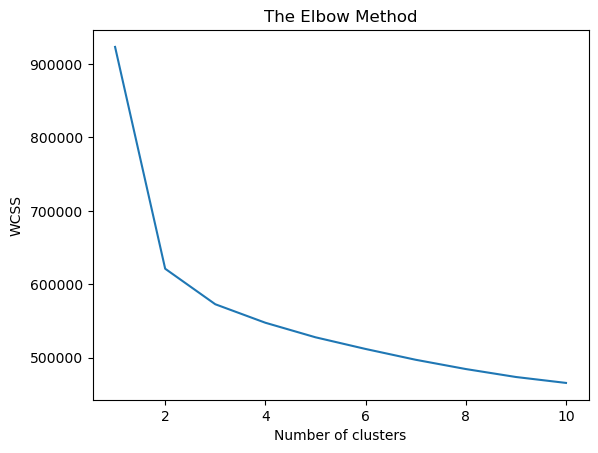

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Silhouette Analysis

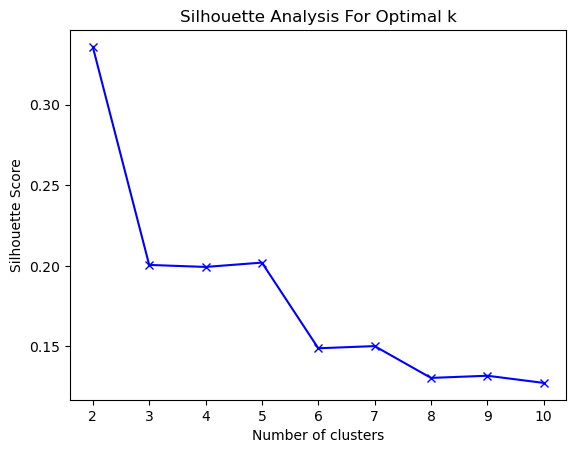

In [9]:
from sklearn.metrics import silhouette_score
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    sil_scores.append(silhouette_score(X, kmeans.labels_))
plt.plot(range(2, 11), sil_scores, 'bx-')
plt.title('Silhouette Analysis For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### Dividing data into clusters

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
data['Cluster'] = y_kmeans

In [14]:
data.groupby('Cluster').mean()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cluster,,,,,,,,,,,,,,,,,,,,,
0,14673.262890,0.192892,0.602620,0.230352,0.204405,0.194060,0.140914,0.133489,0.125313,0.096780,...,0.091106,0.251794,0.340147,0.136659,0.068163,0.050058,0.164609,0.096863,0.067746,0.056649
1,15227.889423,0.191413,8.758945,0.266100,0.265094,0.228869,0.169611,0.145125,0.140318,0.104987,...,0.089893,0.268113,0.381597,0.150827,0.073457,0.052996,0.179450,0.110465,0.084191,0.057804
2,15146.982600,0.197489,4.463336,0.269824,0.262739,0.237385,0.163435,0.144171,0.143674,0.108004,...,0.073204,0.253169,0.364902,0.133607,0.078424,0.055804,0.164181,0.107755,0.074696,0.054437
3,16148.340426,0.088861,3.444305,0.795995,0.718398,0.475594,0.350438,0.275344,0.315394,0.276596,...,0.705882,0.784731,0.732165,0.822278,0.271589,0.236546,0.928661,0.471840,0.533166,0.598248
4,14079.475556,0.217778,3.853333,0.333333,0.271111,0.111111,0.173333,0.124444,0.124444,0.084444,...,0.120000,0.240000,0.404444,0.222222,0.035556,0.035556,0.555556,0.435556,0.217778,0.066667
